# Web Scraping & Data Analysis Project Template

## Indice
1. Import librerie
2. Definizione URL e scraping dati
3. Parsing e salvataggio dati
4. Pulizia dataset
5. Analisi esplorativa
6. Visualizzazioni

## Import librerie

In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Definizione URL e scraping dati

In [79]:
#url = 'https://www.imdb.com/it/chart/top/'
#response = requests.get(url)         #IMDb Implemented a script to protect from the scraping so we are forced to use another url
#headers = {
    #'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
#}

#response = requests.get(url, headers=headers)

#print(soup.prettify())


In [80]:
url = 'https://books.toscrape.com/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

#print(soup.prettify())

## Estrazione Dati

In [ ]:
books = soup.find_all('article',class_ = 'product_pod')
title=[]
price=[]
rating=[]
rating_map = {
    'One':1,
    'Two':2,
    'Three':3,
    'Four':4,
    'Five':5
}

for book in books:
    titolo = book.h3.a['title']
    prezzo = book.find('p', class_='price_color').text
    title.append(titolo)
    price.append(prezzo)

    punteggio = book.find('p',class_='star-rating')
    
    if punteggio:
        # Le classi sono una lista, l'ultima classe è quella che indica il rating (es. 'Two')
        # Filtriamo le classi per trovare quella che ci interessa (es. 'One', 'Two', etc.)
        rating_class = [cls for cls in punteggio['class'] if cls in rating_map]
        
        # Se troviamo una classe di rating valida, la mappiamo al valore numerico
        if rating_class:
            numerical_rating = rating_map[rating_class[0]]
            rating.append(numerical_rating)
        else:
            # Se non troviamo una classe di rating valida, aggiungiamo None o un valore predefinito
            rating.append(0) # O 0, a seconda di come vuoi gestire i rating mancanti/non riconosciuti
   

## Parsing e salvataggio dati

In [82]:
df = pd.DataFrame({
    'Title': title,
    'Price': price,
    'Rating': rating
})


## Pulizia dataset

In [83]:
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   20 non-null     object
 1   Price   20 non-null     object
 2   Rating  20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 612.0+ bytes


,Title,Price,Rating
0,A Light in the Attic,Â£51.77,3
1,Tipping the Velvet,Â£53.74,1
2,Soumission,Â£50.10,1
3,Sharp Objects,Â£47.82,4
4,Sapiens: A Brief History of Humankind,Â£54.23,5
5,The Requiem Red,Â£22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,4
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,3
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,4
9,The Black Maria,Â£52.15,1


## Analisi esplorativa

In [84]:
df.describe()

,Rating
count,20.000000
mean,2.850000
std,1.565248
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


## Visualizzazioni

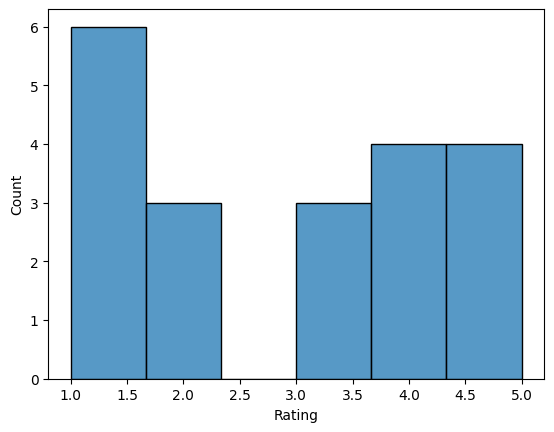

In [85]:
sns.histplot(df['Rating'])
plt.show()

## Insight e Conclusioni

Questo progetto ha rappresentato un'ottima opportunità per mettere in pratica le tecniche di web scraping utilizzando le librerie Python requests e BeautifulSoup. In precedenza mai utilizzate, quindi un modo per imparare tecniche nuove
L'obiettivo principale era estrarre informazioni strutturate da una pagina web, in particolare i titoli, i prezzi e i rating dei libri dal sito "books.toscrape.com".

Durante l'esercizio, è emersa una sfida interessante legata all'estrazione dei rating, che erano rappresentati tramite classi CSS testuali (es. "Two", "Three") anziché valori numerici diretti. Questa situazione ha permesso di implementare una soluzione efficace basata su una mappatura (dictionary) per convertire queste classi in valori numerici significativi, dimostrando la flessibilità necessaria nell'adattarsi alle diverse strutture HTML dei siti web.

Il processo di scraping ha permesso di raccogliere i dati desiderati e di organizzarli in un DataFrame pandas, un formato ideale per le successive fasi di analisi. Sebbene l'analisi esplorativa sia stata qui limitata a una semplice descrizione statistica e una visualizzazione della distribuzione dei rating, essa ha mostrato il potenziale per indagini più approfondite. Ad esempio, si potrebbe analizzare la relazione tra prezzo e rating, o identificare i libri con i rating più alti.

In conclusione, questo esercizio ha validato la capacità di:

- Effettuare richieste HTTP a siti web.

- Parsare il contenuto HTML per estrarre elementi specifici.

- Gestire e trasformare dati non standardizzati (come i rating testuali).

- Strutturare i dati estratti per renderli pronti all'analisi.
